In [1]:
from transformers import *

/Users/febrin/.virtualenvs/master_thesis/lib/python3.11/site-packages/transformers/deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(
/Users/febrin/.virtualenvs/master_thesis/lib/python3.11/site-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [2]:
model = BertForMaskedLM.from_pretrained("dkleczek/bert-base-polish-uncased-v1")
tokenizer = BertTokenizer.from_pretrained("dkleczek/bert-base-polish-uncased-v1")
nlp = pipeline('fill-mask', model=model, tokenizer=tokenizer)

loading configuration file config.json from cache at /Users/febrin/.cache/huggingface/hub/models--dkleczek--bert-base-polish-uncased-v1/snapshots/62be9821055981deafb23f217b68cc41f38cdb76/config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM",
    "BertForPreTraining"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.33.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 60000
}



loading weights file pytorch_model.bin from cache at /Users/febrin/.cache/huggingface/hub/models--dkleczek--bert-base-polish-uncased-v1/snapshots/62be9821055981deafb23f217b68cc41f38cdb76/pytorch_model.bin
Generate config GenerationConfig {
  "_from_model_config": true,
  "pad_token_id": 0,
  "transformers_version": "4.33.3"
}

Some weights of the model checkpoint at dkleczek/bert-base-polish-uncased-v1 were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'cls.seq_relationship.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a Ber

loading file vocab.txt from cache at /Users/febrin/.cache/huggingface/hub/models--dkleczek--bert-base-polish-uncased-v1/snapshots/62be9821055981deafb23f217b68cc41f38cdb76/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /Users/febrin/.cache/huggingface/hub/models--dkleczek--bert-base-polish-uncased-v1/snapshots/62be9821055981deafb23f217b68cc41f38cdb76/special_tokens_map.json
loading file tokenizer_config.json from cache at /Users/febrin/.cache/huggingface/hub/models--dkleczek--bert-base-polish-uncased-v1/snapshots/62be9821055981deafb23f217b68cc41f38cdb76/tokenizer_config.json
loading configuration file config.json from cache at /Users/febrin/.cache/huggingface/hub/models--dkleczek--bert-base-polish-uncased-v1/snapshots/62be9821055981deafb23f217b68cc41f38cdb76/config.json
Model config BertConfig {
  "_name_or_path": "dkleczek/bert-base-polish-uncased-v1",
  "architectures": [
    "BertForMaskedLM",
    "BertForPreTraining"
  

In [4]:
for pred in nlp(
    f"Adam Mickiewicz wielkim polskim {nlp.tokenizer.mask_token} był."
):
  print(pred)

{'score': 0.47196507453918457, 'token': 26596, 'token_str': 'poeta', 'sequence': 'adam mickiewicz wielkim polskim poeta był.'}
{'score': 0.09128003567457199, 'token': 10953, 'token_str': 'bohaterem', 'sequence': 'adam mickiewicz wielkim polskim bohaterem był.'}
{'score': 0.0647176057100296, 'token': 5182, 'token_str': 'człowiekiem', 'sequence': 'adam mickiewicz wielkim polskim człowiekiem był.'}
{'score': 0.05232361704111099, 'token': 24293, 'token_str': 'pisarzem', 'sequence': 'adam mickiewicz wielkim polskim pisarzem był.'}
{'score': 0.04554199427366257, 'token': 44095, 'token_str': 'politykiem', 'sequence': 'adam mickiewicz wielkim polskim politykiem był.'}


In [18]:
encoded = tokenizer.encode_plus(
    "siema eniu",                      # Sentence to split into tokens
    add_special_tokens = True, # Add special token '[CLS]' and '[SEP]'
    max_length = 64,           # Pad & truncate all sentences.
    pad_to_max_length = True,
    return_attention_mask = True,   # Construct attention masks.
    return_tensors = 'pt',     # Return pytorch tensors.
)
print(encoded)

{'input_ids': tensor([[    2, 23634,  4519,  3079,     4,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [16]:
text_1 = "Replace me by any text you'd like."
encoded_text = tokenizer(text_1)
encoded_text

{'input_ids': [2, 17366, 13954, 2475, 1947, 20762, 52756, 5491, 11, 46, 18323, 18, 4], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [20]:
model2 = BertModel.from_pretrained("dkleczek/bert-base-polish-uncased-v1")

loading configuration file config.json from cache at /Users/febrin/.cache/huggingface/hub/models--dkleczek--bert-base-polish-uncased-v1/snapshots/62be9821055981deafb23f217b68cc41f38cdb76/config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM",
    "BertForPreTraining"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.33.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 60000
}

loading weights file pytorch_model.bin from cache at /Users/febrin/.cache/huggingface/hub/models--dkleczek--bert-base-polish-uncased-v1/snapshots/62be9821055981deafb2

In [1]:
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [73]:
words = ["kot", "pies", "krowa", 
         "warszawa", "wrocław", "kraków", "kotek", "piesek"]
input_ids = torch.tensor(tokenizer.encode(
    words
)).unsqueeze(0)  # Batch size 1
outputs = model(input_ids)
print(outputs[0][0].shape)

torch.Size([10, 60000])


In [74]:
X_embedded = TSNE(
    n_components=2, learning_rate='auto',
    init='random', perplexity=1
).fit_transform(outputs[0][0].detach().numpy())

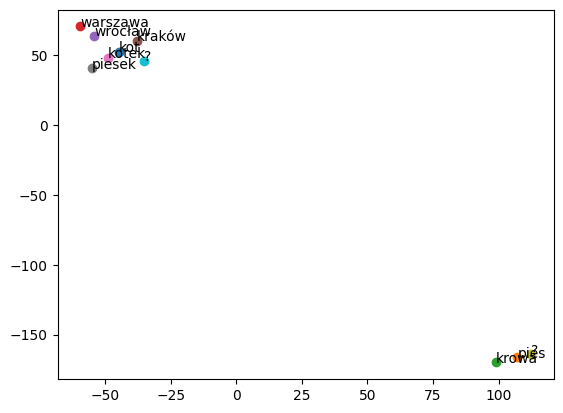

In [75]:
labels = words + ["?", "?"]
for i, (x, y) in enumerate(X_embedded):
    plt.scatter(x, y)
    plt.text(x, y, labels[i])

In [ ]:
from embeddings.embedding.auto_flair import AutoFlairWordEmbedding
from flair.data import Sentence

sentence = Sentence("Myśl z duszy leci bystro, Nim się w słowach złamie.")

embedding = AutoFlairWordEmbedding.from_hub("clarin-pl/word2vec-kgr10")
embedding.embed([sentence])

for token in sentence:
    print(token)
    print(token.embedding)


In [48]:
from gensim.models import KeyedVectors
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [49]:
word2vec = KeyedVectors.load("word2vec/word2vec_100_3_polish.bin")

In [138]:
glove = KeyedVectors.load_word2vec_format("glove_100_3_polish.txt")

In [139]:
glove.similar_by_word("informatyka")

/Users/febrin/.virtualenvs/master_thesis/lib/python3.11/site-packages/gensim/models/keyedvectors.py:849: RuntimeWarning: invalid value encountered in divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]


[('informatyk', 0.8093269467353821),
 ('informatyczny', 0.7693363428115845),
 ('zarządzanie', 0.7306443452835083),
 ('elektrotechnika', 0.7248907089233398),
 ('logistyka', 0.7239428162574768),
 ('specjalność', 0.7210637331008911),
 ('robotyka', 0.7115141153335571),
 ('matematyka', 0.7102717757225037),
 ('telekomunikacja', 0.705341100692749),
 ('rachunkowość', 0.699932336807251)]

In [50]:
import json

with open("../fieldsOfStudy.json") as f:
    data = json.load(f)

len(data)

345

In [51]:
data[0]

{'id': '1',
 'facultyName': 'Wydział Matematyki, Informatyki i Mechaniki',
 'universityId': '1',
 'type': 'Informatyka',
 'numberOfPoints': 250}

In [52]:
word2vec.similar_by_word("sieć")

/Users/febrin/.virtualenvs/master_thesis/lib/python3.11/site-packages/gensim/models/keyedvectors.py:849: RuntimeWarning: invalid value encountered in divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]


[('siatka', 0.7224545478820801),
 ('łącze', 0.7075912356376648),
 ('kabel', 0.6950553059577942),
 ('infrastruktura', 0.6916294097900391),
 ('kanał', 0.6863195896148682),
 ('rurociąg', 0.6738418936729431),
 ('urządzenie', 0.6720010638237),
 ('maszyneria', 0.6664237976074219),
 ('instalacja', 0.651033878326416),
 ('magistrala', 0.6498816013336182)]

(345, 100)


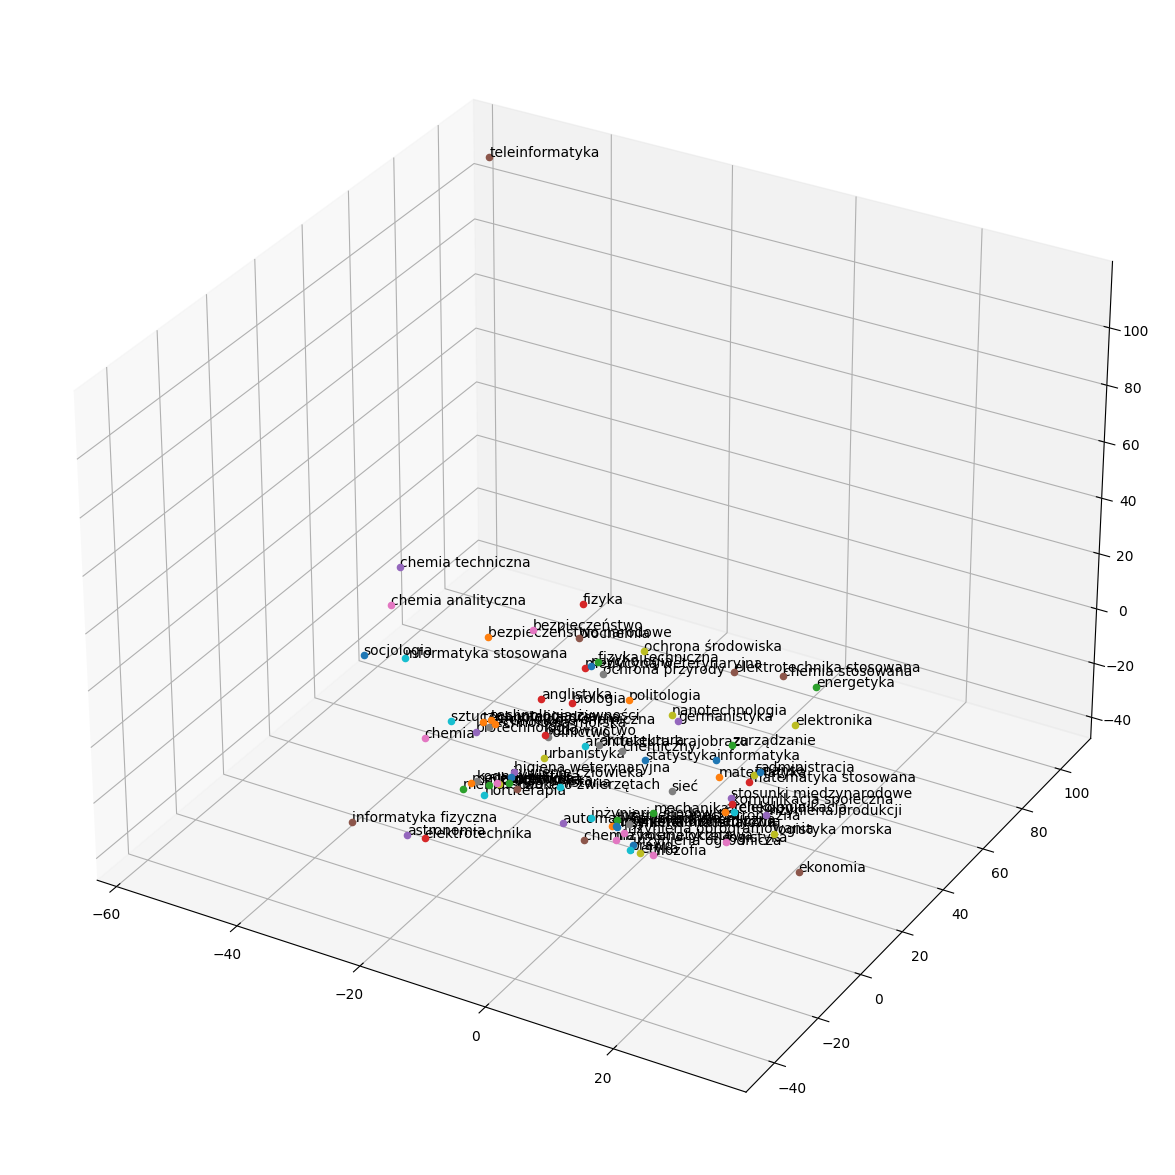

In [130]:
rules = {
    "cyberbezpieczeństwo": "bezpieczeństwo",
    "sieci komputerowe": "sieć",
    "chemoinżynieria": "chemiczny",
}
def get_embed(x):
    try:
        v = word2vec.get_vector(x)
    except:
        v = None
    return v


labels = []
vectors = []
for i, x in enumerate(data):
    fac = x["type"].lower()
    if fac in rules:
        fac = rules[fac]
    v = get_embed(fac)
    if v is not None:
        ...
    elif fac.find(" ") != -1:
        subv = [
            get_embed(z) for z in fac.split(" ")
        ]
        subv = [z for z in subv if z is not None]
        if len(subv) > 0:
            v = np.array(subv).mean(axis=0)

    if v is None:
        raise RuntimeError(i, fac)
    vectors.append(v)
    labels.append(fac)

assert len(vectors) == len(labels), (len(vectors), len(labels))
vectors = np.array(vectors)
print(vectors.shape)


X_embedded = TSNE(
    n_components=3, learning_rate='auto',
    init='random', perplexity=2
).fit_transform(vectors)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
all_points = []
added_facults = {}
for i, (x, y, z) in enumerate(X_embedded):
    # x += 0.83
    # y -= 4.01
    # z -= 0.39
    if labels[i] in added_facults:
        continue
    else:
        added_facults[labels[i]] = (str(x), str(y), str(z))
    ax.scatter(x, y, z)
    ax.text(x, y, z, labels[i])
    all_points.append([x, y ,z])

In [131]:
data[0]

{'id': '1',
 'facultyName': 'Wydział Matematyki, Informatyki i Mechaniki',
 'universityId': '1',
 'type': 'Informatyka',
 'numberOfPoints': 250,
 'embedding': ('-19.713373', '-18.4609', '29.042313')}

In [132]:
np.array(all_points).mean(axis=0)

array([-1.9811282, -1.1264603,  3.835538 ], dtype=float32)

In [133]:
len(added_facults)

82

In [134]:
json_object = json.dumps(added_facults, indent = 4) 

In [135]:
with open("../faculty_embeddings.json", "w") as f:
    f.write(json_object)

(232, 3)


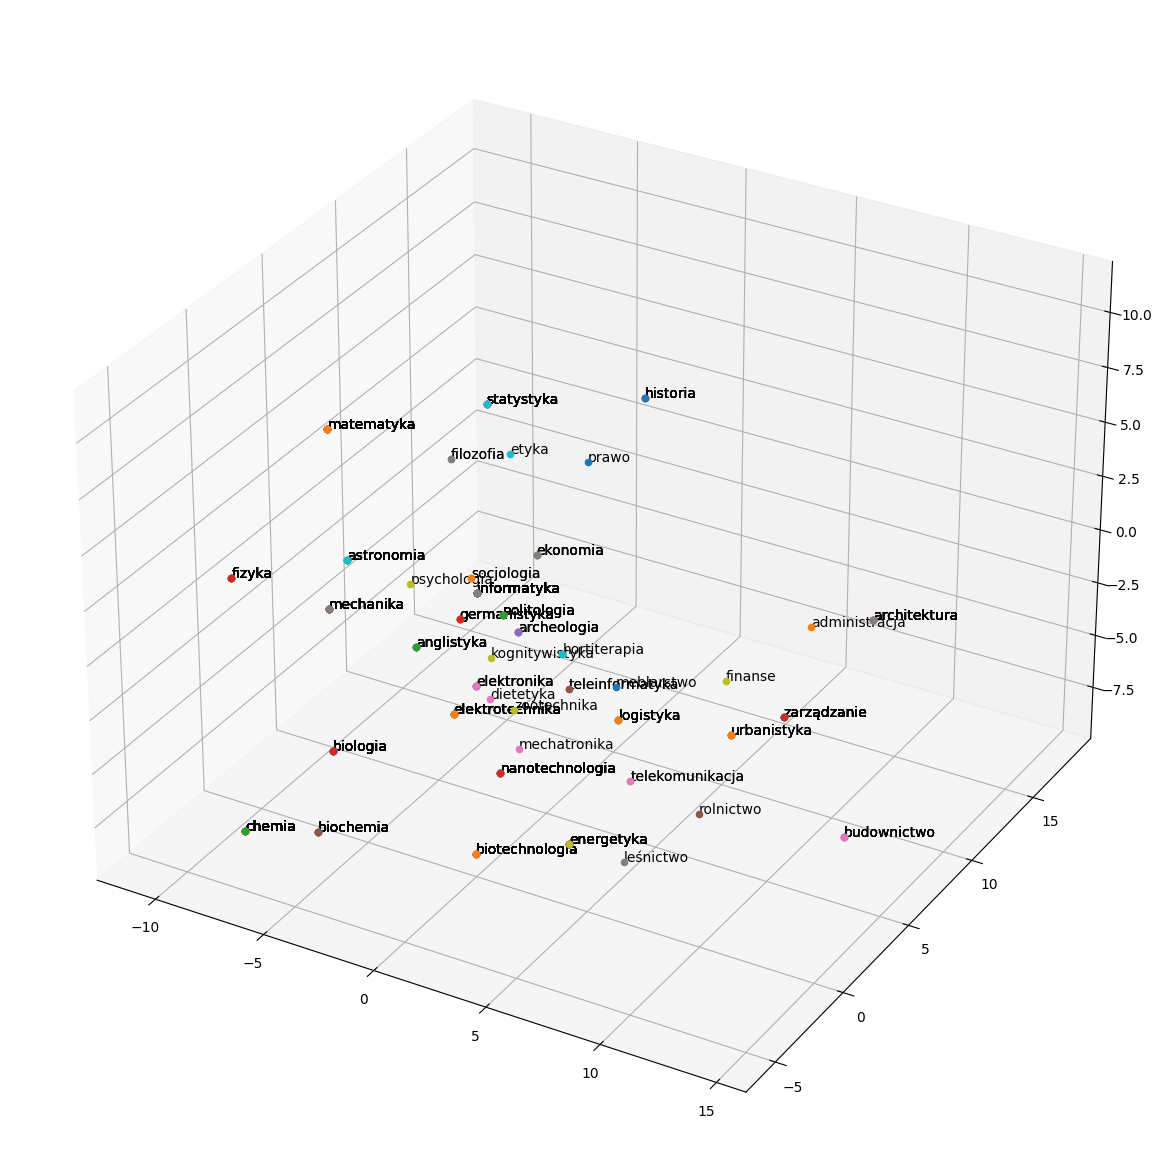

In [19]:
pca = PCA(n_components=3, svd_solver='full')

X_embedded = pca.fit_transform(vectors)
print(X_embedded.shape)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
for i, (x, y, z) in enumerate(X_embedded):
    ax.scatter(x, y, z)
    ax.text(x, y, z, labels[i])